# Netflix Data 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
netflix_overall = pd.read_csv("netflix_titles.csv")
netflix_overall.head()
netflix_overall.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
netflix_overall.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [7]:
#type이 TV show인 것을 netflix_shows로 지정
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show']

In [8]:
#type이 Movie인 것을 netflix_movies로 지정
netflix_movies = netflix_overall[netflix_overall['type'] == 'Movie']

## Analysis of movies vs TV show

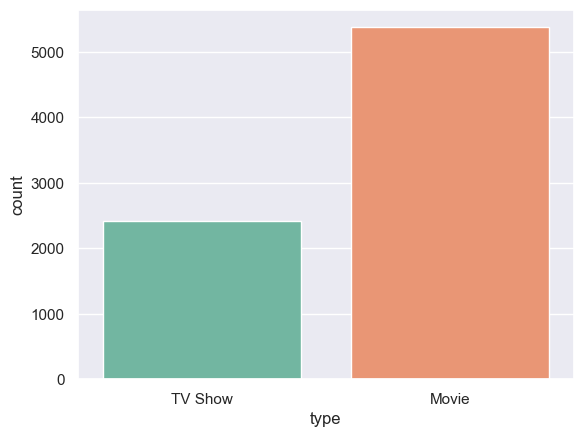

In [10]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'type', data = netflix_overall, palette = "Set2")

In [11]:
#There are more movies than TV show on Netflix

In [12]:
#Then if a producer wants to release some content, which month must he do so?
#Month when least amount of content is added

## 프로듀서로서 최적의 출시 시기 구하기 (가장 적게 출시되는 시기 구하기)

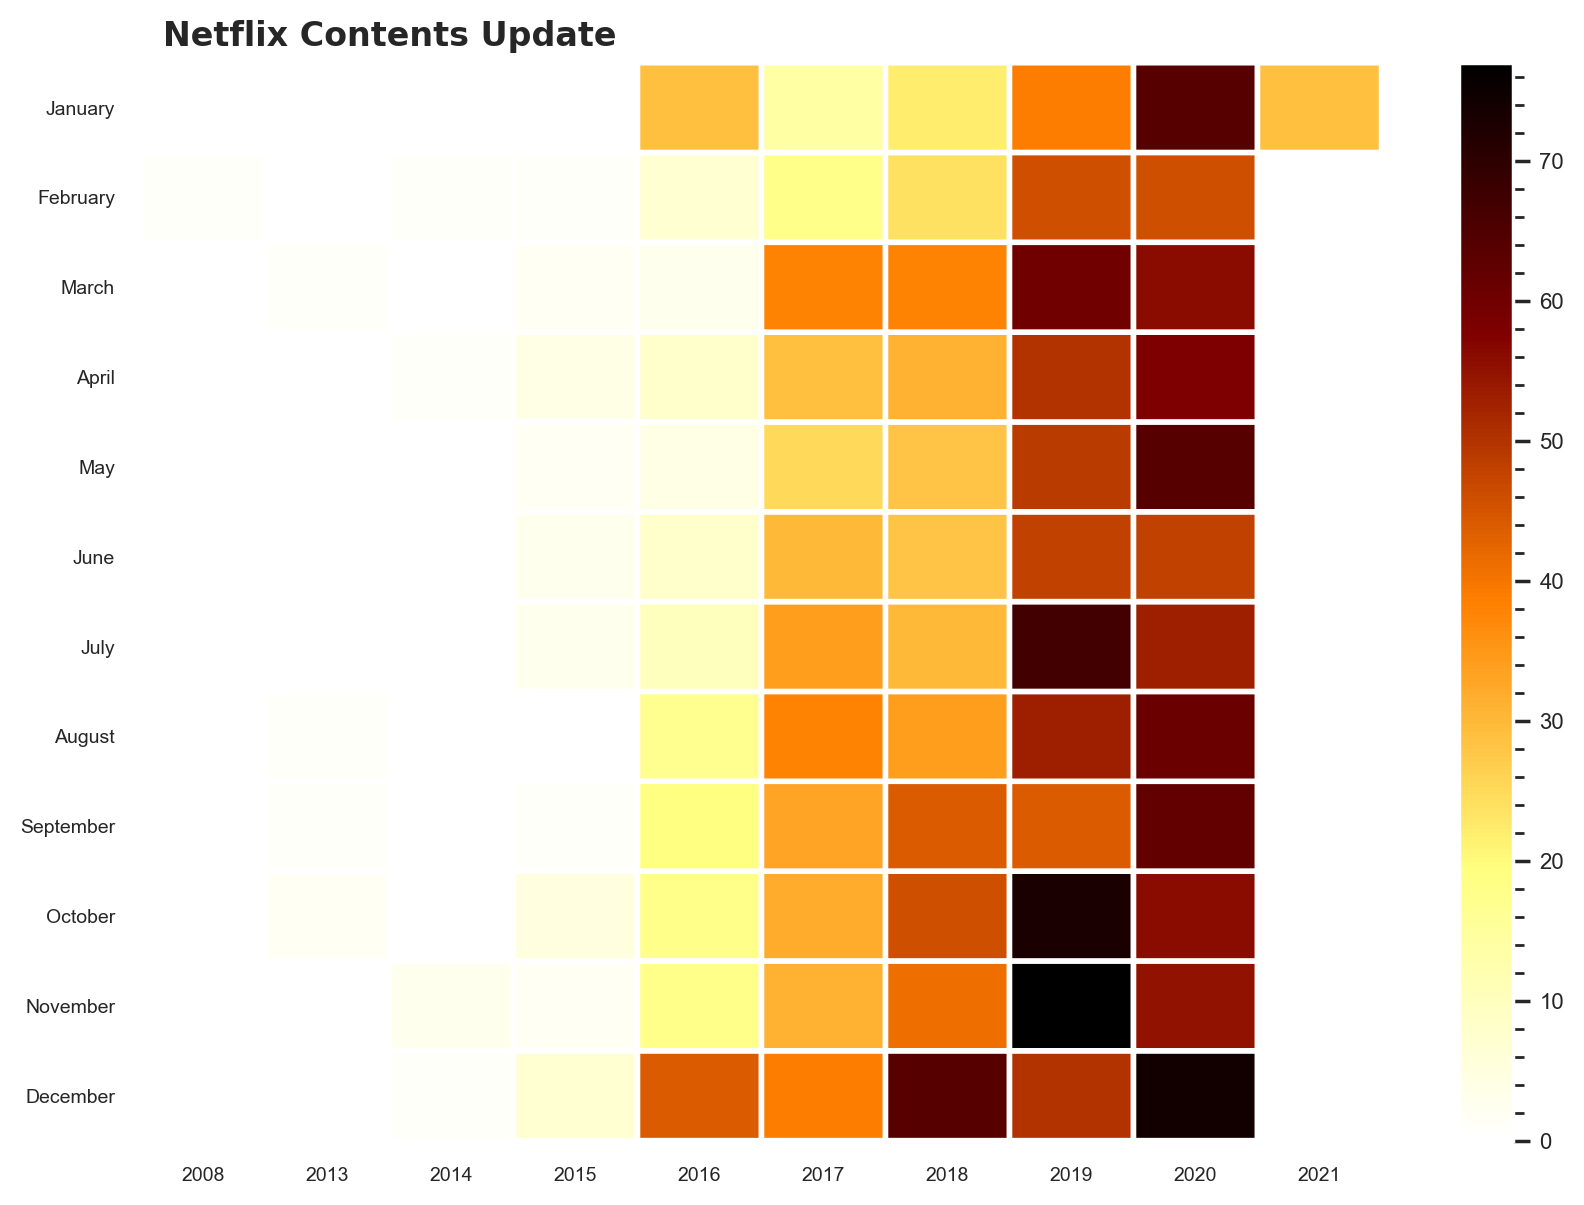

In [32]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='arial')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='arial')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize = 8)
cbar.ax.minorticks_on()
plt.show()

In [33]:
#Consideing 2020, February and June were the months when comparatively much less content was released.
#Therefore, these months may be a good choice for a new release

## Movie ratings analysis

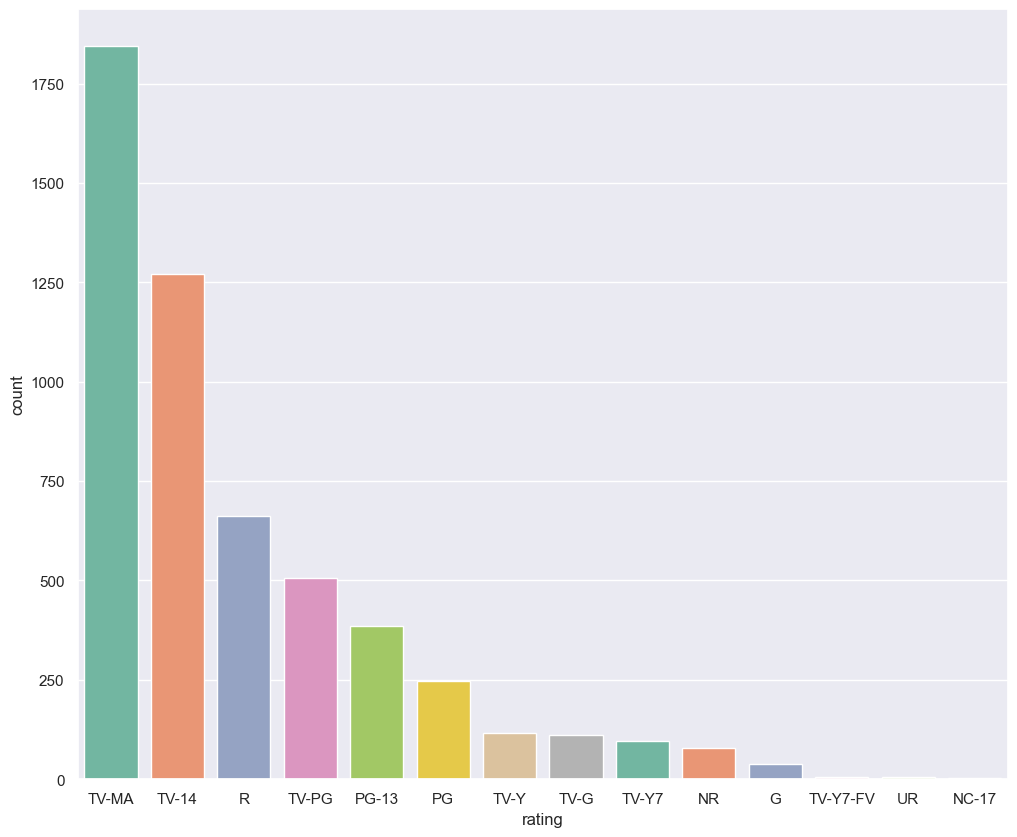

In [27]:
plt.figure(figsize = (12,10))
sns.set(style = 'darkgrid')
ax = sns.countplot(x = "rating", data = netflix_movies, palette = "Set2", order = netflix_movies['rating'].value_counts().index[0:15])

In [ ]:
#Top 3 rating
#TV-MA -> TV-14 -> TV-PG

## Analysing recent contents on Netflix
(IMDB ratings 파일이 없어서 있는 netflix_titles 파일을 계속 활용)

In [73]:
ratings = pd.DataFrame({'Title' : netflix_overall.title,
                       'Release Year' : netflix_overall.release_year,
                       'Rating' : netflix_overall.rating,
                       'Type' : netflix_overall.type})
ratings.drop_duplicates(subset = ['Title', 'Release Year', 'Rating'], inplace = True)
ratings.shape

(7787, 4)

In [127]:
ratings.dropna()
joint_data = ratings.merge(netflix_overall, left_on = 'Title', right_on = 'title', how = 'inner')
joint_data = joint_data.sort_values(by = 'Type', ascending = False)
joint_data

,Title,Release Year,Rating,Type,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,3%,2020,TV-MA,TV Show,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
3870,Maid-Sama!,2010,TV-14,TV Show,s3871,TV Show,Maid-Sama!,NaN,"Ayumi Fujimura, Nobuhiko Okamoto, Kazuyoshi Sh...",Japan,"November 1, 2019",2010,TV-14,1,"Anime Series, Romantic TV Shows","To keep the boys in line, student council pres..."
3844,Madam Secretary,2019,TV-PG,TV Show,s3845,TV Show,Madam Secretary,NaN,"Téa Leoni, Tim Daly, Bebe Neuwirth, Zeljko Iva...",United States,"May 15, 2020",2019,TV-PG,6,TV Dramas,When a highly capable woman becomes secretary ...
3847,Made in Mexico,2018,TV-MA,TV Show,s3848,TV Show,Made in Mexico,NaN,NaN,United States,"September 28, 2018",2018,TV-MA,1,"International TV Shows, Reality TV, Spanish-La...",These Mexico City socialites may lead opulent ...
3851,Maggie & Bianca: Fashion Friends,2017,TV-Y7,TV Show,s3852,TV Show,Maggie & Bianca: Fashion Friends,Iginio Straffi,"Emanuela Rei, Giorgia Boni, Sergio Ruggeri, Lu...",Italy,"March 31, 2019",2017,TV-Y7,1,"Kids' TV, TV Comedies","Originally polar opposites, an American fashio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Carlos Almaraz: Playing with Fire,2019,TV-14,Movie,s1219,Movie,Carlos Almaraz: Playing with Fire,"Elsa Flores Almaraz, Richard J Montoya","Edward James Olmos, Zach De La Rocha",United States,"October 1, 2020",2019,TV-14,83,"Documentaries, LGBTQ Movies","Mixing archival footage with interviews, this ..."
3945,Marlon Wayans: Woke-ish,2018,TV-MA,Movie,s3946,Movie,Marlon Wayans: Woke-ish,Marcus Raboy,Marlon Wayans,United States,"February 27, 2018",2018,TV-MA,67,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W..."
1219,Carlos Ballarta: El amor es de putos,2016,TV-MA,Movie,s1220,Movie,Carlos Ballarta: El amor es de putos,"Jan Suter, Raúl Campos Delgado",Carlos Ballarta,Mexico,"November 21, 2016",2016,TV-MA,67,Stand-Up Comedy,"Carlos Ballarta mocks daily life in Mexico, in..."
3943,Mark Gatiss: A Study in Sherlock,2016,TV-14,Movie,s3944,Movie,Mark Gatiss: A Study in Sherlock,Nathan Landeg,"Benedict Cumberbatch, Martin Freeman, Una Stub...",Unknown,"May 1, 2016",2016,TV-14,29,Movies,"Mark Gatiss, who co-created “Sherlock” and pla..."


In [82]:
# shows_country = netflix_overall['country']
# shows_country.head

# #country_count = shows_country['country'].value_counts().sort_values(ascending = False)
# shows_country = pd.DataFrame(shows_country)
# topcountries = shows_country[0:11]
# topcountries

In [75]:
import plotly.express as px
from plotly import graph_objects as go

In [84]:
top_rated = joint_data[0:10]
fig = px.sunburst(
    top_rated,
    path = ['title', 'country'],
    values = 'Release Year',
    color = 'Rating')
fig.show()

In [85]:
#많이 제작한 국가 순서대로 보기

country_count = joint_data['country'].value_counts().sort_values(ascending = False)
country_count = pd.DataFrame(country_count)
topcountries = country_count[0:11]
topcountries

,country
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
Canada,177
Spain,134
France,115
Egypt,101
Mexico,100


In [81]:
data = dict(
    number = [2555, 6923, 397, 226, 183, 177, 134, 115, 101, 100],
    country = ["United States", "India", "United Kingdom", "Japan", "South Korea", "Canada", "Spain", "France", "Egypt", "Mexico"])
fig = px.funnel(data, x = 'number', y = 'country')
fig.show()

## Year wise analysis

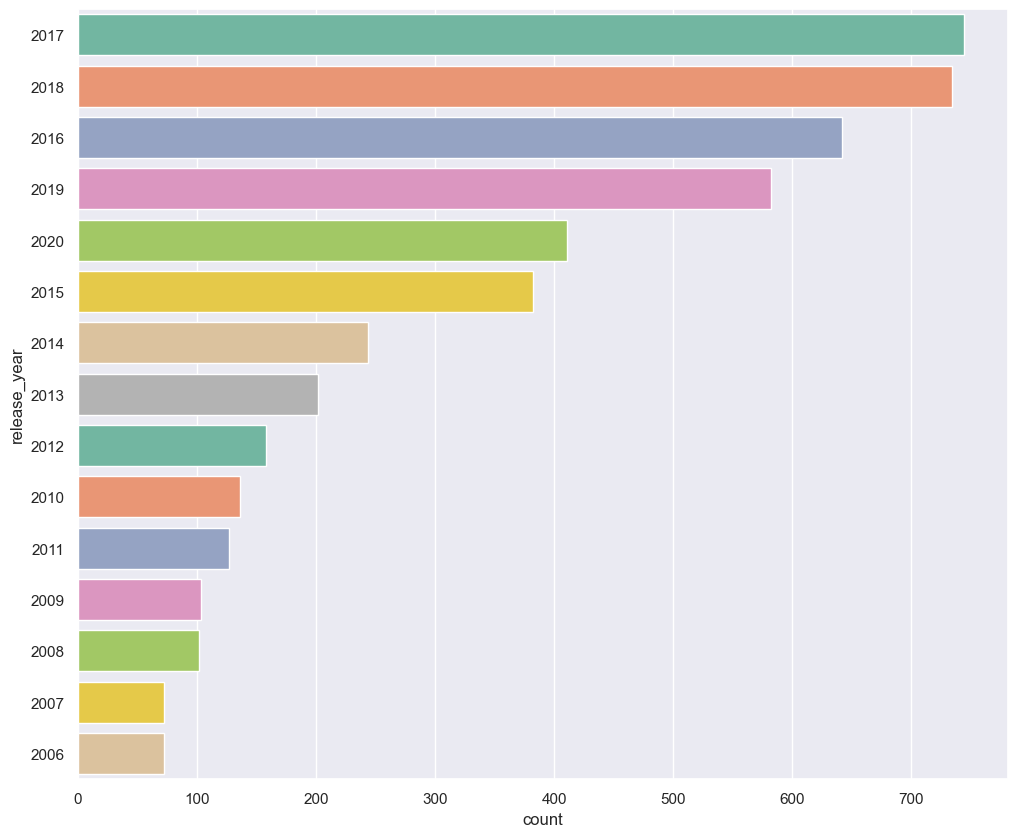

In [50]:
plt.figure(figsize = (12,10))
sns.set(style = 'darkgrid')
ax = sns.countplot(y = "release_year", data = netflix_movies, palette = "Set2", order = netflix_movies['release_year'].value_counts().index[0:15])

In [86]:
#2017 was the year when most of contents were released

## TOP10 movie content creating countries

In [89]:
countries = {}  #딕셔너리 형태로 생성
netflix_overall['country'] = netflix_overall['country'].fillna('Unknown')
cou = list(netflix_overall['country'])
for i in cou:
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

In [90]:
countries_fin = {}  #딕셔너리 형태로 생성
for country, no in countries.items():
    country = country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no

countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item : item[1], reverse = True)}

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'Canada'),
 Text(2, 0, 'France'),
 Text(3, 0, 'UnitedKingdom'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Japan'),
 Text(8, 0, 'Spain'),
 Text(9, 0, 'Australia')]

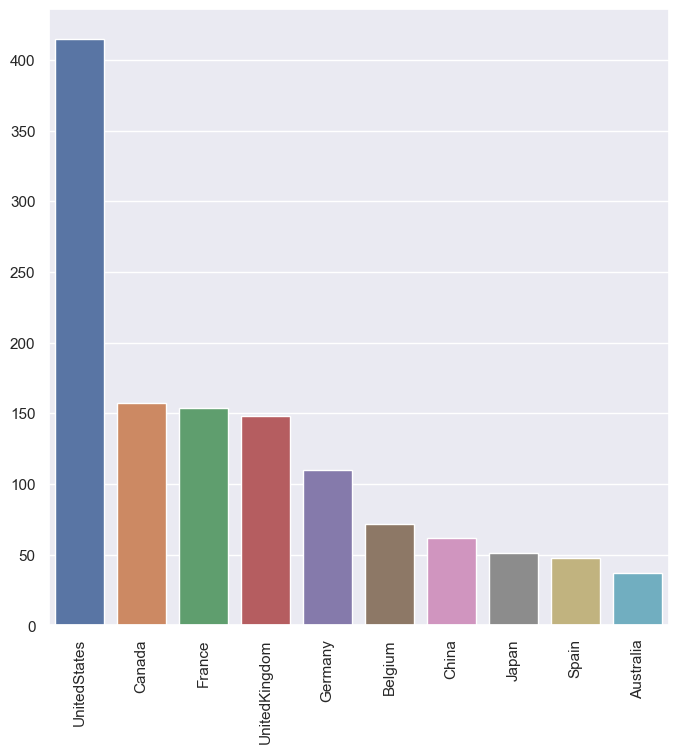

In [92]:
plt.figure(figsize = (8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation = 90)

## Analysis of duration of movies

In [ ]:
#season과 같은 str이 섞여있어서 str제거하는 코드 추가 -> 한번 실행했더니 아예 없어짐
#netflix_overall['duration'] = netflix_overall['duration'].str.extract(r'(\d+)', expand=False)

In [124]:
#netflix_overall['duration'] = netflix_overall['duration'].str.replace('min', '')
netflix_overall['duration'] = netflix_overall['duration'].astype(str).astype(int)

print(netflix_overall['duration'])

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7787, dtype: int64


<AxesSubplot:xlabel='duration', ylabel='Density'>

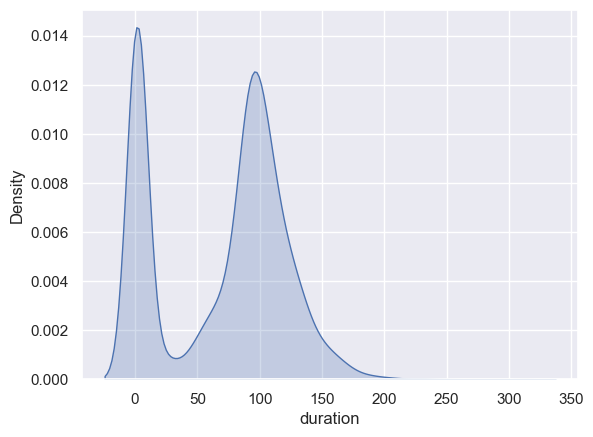

In [125]:
sns.set(style = 'darkgrid')
sns.kdeplot(data = netflix_overall['duration'], shade = True)

In [126]:
#A good amount of movies on Netflix are among the duration of 75-120 mins.
#Movie producers would consider their movies' duration no longer than 3 hours.

# 학습내용


**Missing data를 처리하는 메서드**
#dropna() 메서드
- 결측값이 포함된 열/행을 제거하는 메서드


#fillna() 메서드
- 결측값에 다른 값으로 대체해주는 메서드
Ex) df.fillna(value = "FILL VALUE") -> 결측값을 특정 텍스트로 대체
    df['A'].fillna(value=df['A'].mean()) -> 원하는 값(여기서는 평균)으로 대체


#unstack() 함수
stack() - 컬럼을 인덱스로 체인지
unstack() - 인덱스를 컬럼으로 체인지
df = pd.DataFrame({'col_1':[1,2}, index = {'one', 'two'})
stack = df.stack()
two col_1 1
one col_1 2
stack.unstack()
-> 다시 컬럼과 인덱스가 있는 표로 만들어줌


#value_counts() 함수
값별로 데이터의 수를 출력해주는 함수
Ex) data['item'].value_counts() - item별 데이터 갯수를 출력시켜줌

------------------------------------------------------------------

**어려웠던 코드 정리**

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
=> Year(col1) 다음 month(col2) 컬럼 기준으로 그룹핑한 후, month별 개수 카운트 -> 인덱스를 컬럼으로 변경 -> month_order에서 nan값은 0으로 채운다


ratings.drop_duplicates(subset = ['Title', 'Release Year', 'Rating'], inplace = True)
=> drop_duplicates(*, keep = 'first', inplace = False) #기본값 설정
세가지 열 title, release year, rating 에서 drop_duplicates() 진행 - 중복되는 값은 제거하고 리턴
keep = 'last' : 중복값 중에 가장 마지막 값을 남기는 경우
inplace = True : 실행하고 아무것도 반환하지 않음


joint_data = joint_data.sort_values(by = 'Type', ascending = False)
=> joint_data를 'Type'기준으로 값을 정렬하고 내림차순 정렬


netflix_overall['duration'] = netflix_overall['duration'].str.extract(r'(\d+)', expand=False)
=> 수로 그래프를 그려야하는 테이블 데이터 값에 str이 들어가있는 경우, str을 제거하는 코드


netflix_overall['duration'] = netflix_overall['duration'].astype(str).astype(int)
=> 데이터 형태를 통일시켜주기 위해 현재 타입이 str이면 int로 바꿔준다 (.astype() 사용)




#seaborn(sns)에서 자주 사용하는 그래프 정리
Ex) flights 데이터 셋을 사용
flights = sns.load_dataset('flights')

#barplot
sns.barplot(data = flights, x="year", y="passengers")

#boxplot
sns.boxplot(data = flights, x="year", y="passengers")

#lineplot
sns.lineplot(data = flights, x="year", y="passengers")

#distplot - 하나의 데이터 분포를 확인
sns.displot(flight["passengers"])
